In [12]:
# 1.Завантажте необхідні дані
import pandas as pd
import matplotlib.pyplot as plt

# Завантажуємо датасет з CSV файлу
df = pd.read_csv('HeartDiseaseTrain-Test.csv')
df_copy = df.copy()
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


target
1    526
0    499
Name: count, dtype: int64


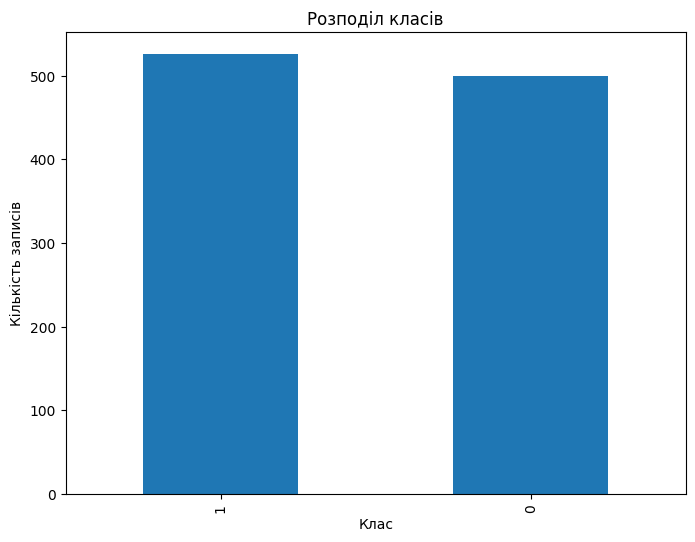

In [13]:
# 2. Підготуйте їх необхідним чином
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Заповнюємо пропущені значення (якщо є) середніми для числових стовпців та модою для категоріальних
for col in df_copy.select_dtypes(include=['float64', 'int64']).columns:
    df_copy[col] = df_copy[col].fillna(df_copy[col].mean())

for col in df_copy.select_dtypes(include=['object']).columns:
    df_copy[col] = df_copy[col].fillna(df_copy[col].mode()[0])

label_encoder = LabelEncoder()

# Перетворюємо категоріальні стовпці на числові
df_copy['sex'] = label_encoder.fit_transform(df_copy['sex'])
df_copy['chest_pain_type'] = label_encoder.fit_transform(df_copy['chest_pain_type'])
df_copy['fasting_blood_sugar'] = label_encoder.fit_transform(df_copy['fasting_blood_sugar'])
df_copy['rest_ecg'] = label_encoder.fit_transform(df_copy['rest_ecg'])
df_copy['exercise_induced_angina'] = label_encoder.fit_transform(df['exercise_induced_angina'])
df_copy['slope'] = label_encoder.fit_transform(df_copy['slope'])
df_copy['vessels_colored_by_flourosopy'] = label_encoder.fit_transform(df_copy['vessels_colored_by_flourosopy'])
df_copy['thalassemia'] = label_encoder.fit_transform(df_copy['thalassemia'])
df_copy['target'] = label_encoder.fit_transform(df_copy['target'])

# Масштабуємо числові стовпці
scaler = StandardScaler()
df_copy[['age', 'resting_blood_pressure', 'cholestoral', 'Max_heart_rate', 'oldpeak']] = scaler.fit_transform(df_copy[['age', 'resting_blood_pressure', 'cholestoral', 'Max_heart_rate', 'oldpeak']])

# Задаємо перемішування (shuffle) для кожного методу
X = df_copy.drop(columns=['target'])
y = df_copy['target']

# Розділяємо дані на тренувальний (70%) та тестовий (30%) набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Розподіл класів
class_distribution = y.value_counts()
print(class_distribution)

# Гістограма для розподілу класів
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar')
plt.title('Розподіл класів')
plt.xlabel('Клас')
plt.ylabel('Кількість записів')
plt.show()


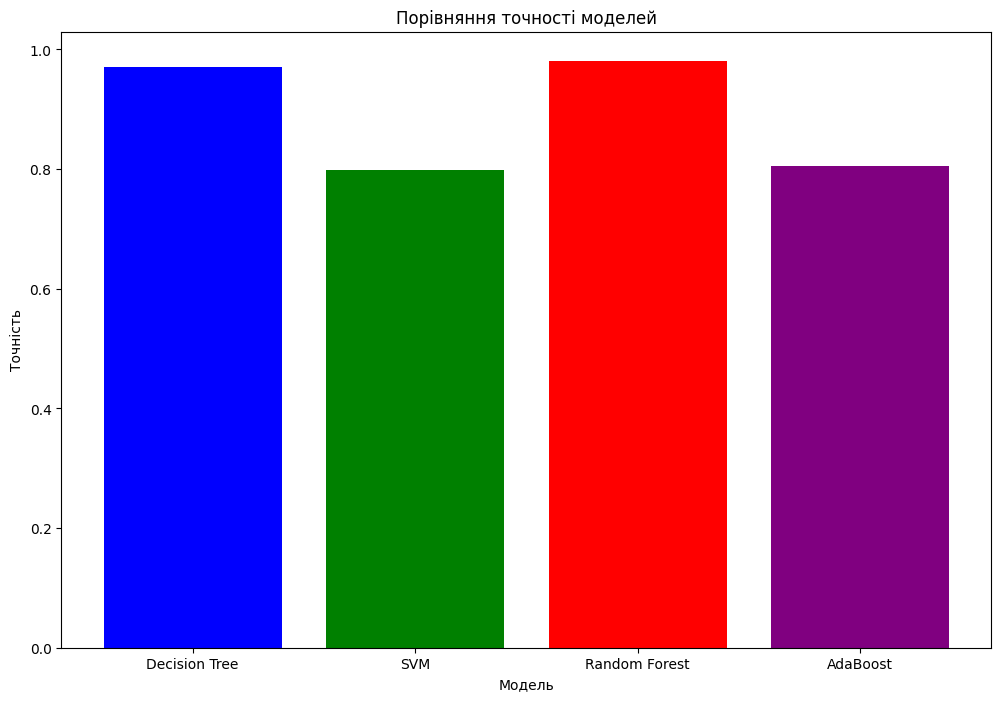

Accuracy of Decision Tree (single): 0.9708
Accuracy of SVM (single): 0.7987
Accuracy of Random Forest (ensemble, parallel): 0.9805
Accuracy of AdaBoost (ensemble, sequential): 0.8052


In [23]:
# 3. Сформуйте гомогенні ансамблі на основі будь-яких 2-х одиночних моделей (з попередніх робіт). Один з них зробіть паралельним, а інший - послідовним. Порівняйте ефективність роботи одиночних та ансамблевих моделей. 
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 1. Одиночні моделі
# Decision Tree
dt = DecisionTreeClassifier(random_state=100)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)

# SVM
svm = SVC(kernel='linear', random_state=100)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)

# 2. Гомогенні ансамблі
# Паралельний ансамбль - RandomForest (DecisionTreeClassifier)
rf = RandomForestClassifier(n_estimators=100, random_state=100)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

# Послідовний ансамбль - AdaBoost (DecisionTreeClassifier)
ab = AdaBoostClassifier(estimator=SVC(probability=True, kernel='linear'), n_estimators=100, random_state=100)
ab.fit(X_train, y_train)
ab_pred = ab.predict(X_test)
ab_accuracy = accuracy_score(y_test, ab_pred)

# Порівняння результатів
model_names = ['Decision Tree', 'SVM', 'Random Forest', 'AdaBoost']
accuracies = [dt_accuracy, svm_accuracy, rf_accuracy, ab_accuracy]

plt.figure(figsize=(12, 8))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red', 'purple'])
plt.title('Порівняння точності моделей')
plt.xlabel('Модель')
plt.ylabel('Точність')
plt.show()

# Виведення точності
print(f'Accuracy of Decision Tree (single): {dt_accuracy:.4f}')
print(f'Accuracy of SVM (single): {svm_accuracy:.4f}')
print(f'Accuracy of Random Forest (ensemble, parallel): {rf_accuracy:.4f}')
print(f'Accuracy of AdaBoost (ensemble, sequential): {ab_accuracy:.4f}')

# Random Forest (паралельний ансамбль):
# Використовує кілька моделей (дерев рішень), які працюють незалежно один від одного.
# Кожне дерево має рівну вагу, і прогноз формується через голосування між деревами.
# Добре працює з великими даними та має менше шансів на перепідгонку, 
# оскільки кожне дерево збудоване на випадковій підмножині даних і ознак.

# AdaBoost (послідовний ансамбль):
# Використовує кілька моделей (у вашому випадку — SVC), де кожен наступний класифікатор намагається виправити помилки попереднього.
# Моделі працюють по черзі, і ваги коригуються на основі помилок попередніх кроків.
# Сильна здатність адаптуватися до важких для класифікації даних, 
# але може бути чутливою до шуму, оскільки вона підвищує ваги неправильно класифікованих зразків.

In [15]:
# 4. Для паралельного застосуйте почергово будь-які 2 підходи інтеграції прогнозів отриманих на основі базових моделей (1 простий і 1 складний зі слайду 21).
from sklearn.ensemble import StackingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Базові моделі для ансамблів
dt_model = DecisionTreeClassifier(random_state=42)
lr_model = LogisticRegression(max_iter=1000, random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Простий метод (Max Voting)
voting_model = VotingClassifier(
    estimators=[('dt', dt_model), ('lr', lr_model), ('knn', knn_model)],
    voting='hard'
)

# Складний метод (Stacking)
stacking_model = StackingClassifier(
    estimators=[('dt', dt_model), ('lr', lr_model), ('knn', knn_model)],
    final_estimator=LogisticRegression(max_iter=1000, random_state=42),
    stack_method='auto',
    n_jobs=-1
)

# Тренування і оцінка моделей
models = {
    'Max Voting': voting_model,
    'Stacking': stacking_model
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {name}\nAccuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred, zero_division=0))
    print('-' * 60)



# Max Voting (Hard Voting):
# Простий підхід: більше класів, що голосують, вибирається клас з найбільшим числом голосів.
# Більш стабільний результат за рахунок простого комбінування, підходить для простих випадків.

# Stacking:
# Складніший метод, що створює нові ознаки на основі прогнозів базових моделей 
# і використовує ще одну модель для остаточного прогнозу.
# Може бути більш точним, оскільки враховує більше інформації з прогнозів базових моделей, але потребує більшої обчислювальної потужності та налаштування.

Model: Max Voting
Accuracy: 0.9481
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       150
           1       0.96      0.94      0.95       158

    accuracy                           0.95       308
   macro avg       0.95      0.95      0.95       308
weighted avg       0.95      0.95      0.95       308

------------------------------------------------------------
Model: Stacking
Accuracy: 0.9805
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       150
           1       1.00      0.96      0.98       158

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308

------------------------------------------------------------


In [16]:
# 5. Підберіть оптимальні параметри для створених ансамблевих моделей.
from sklearn.model_selection import GridSearchCV

# Розширення параметрів для VotingClassifier
voting_param_grid = {
    'voting': ['hard', 'soft'],  # Можна вибрати жорстке або м'яке голосування
    'weights': [(1, 1, 1), (2, 1, 1), (1, 2, 1), (1, 1, 2), (1, 1, 1.5), (1.5, 1, 1)],  # Додаткові варіанти ваг
}

# GridSearch для VotingClassifier
voting_search = GridSearchCV(voting_model, voting_param_grid, cv=6, n_jobs=-1, verbose=2)  # Збільшено до 10 фолдів
voting_search.fit(X_train, y_train)

# Результати підбору параметрів для VotingClassifier
print(f"Best parameters for VotingClassifier: {voting_search.best_params_}")
voting_best_model = voting_search.best_estimator_

# Оцінка моделі після підбору параметрів
y_pred_voting = voting_best_model.predict(X_test)
print(f"\nVotingClassifier (Optimized) Accuracy: {accuracy_score(y_test, y_pred_voting):.4f}")
print(classification_report(y_test, y_pred_voting, zero_division=0))

# Розширення параметрів для StackingClassifier
stacking_param_grid = {
    'final_estimator__C': [0.01, 0.1, 1, 10, 100],  
    'stack_method': ['auto', 'predict_proba'],  
    'n_jobs': [-1], 
    'final_estimator__max_iter': [100, 500, 1000],  
}

# GridSearch для StackingClassifier
stacking_search = GridSearchCV(stacking_model, stacking_param_grid, cv=6, n_jobs=-1, verbose=2)  # Збільшено до 10 фолдів
stacking_search.fit(X_train, y_train)

# Результати підбору параметрів для StackingClassifier
print(f"\nBest parameters for StackingClassifier: {stacking_search.best_params_}")
stacking_best_model = stacking_search.best_estimator_

# Оцінка моделі після підбору параметрів
y_pred_stacking = stacking_best_model.predict(X_test)
print(f"\nStackingClassifier (Optimized) Accuracy: {accuracy_score(y_test, y_pred_stacking):.4f}")
print(classification_report(y_test, y_pred_stacking, zero_division=0))

Fitting 6 folds for each of 12 candidates, totalling 72 fits
Best parameters for VotingClassifier: {'voting': 'soft', 'weights': (1.5, 1, 1)}

VotingClassifier (Optimized) Accuracy: 0.9903
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       150
           1       1.00      0.98      0.99       158

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308

Fitting 6 folds for each of 30 candidates, totalling 180 fits

Best parameters for StackingClassifier: {'final_estimator__C': 0.01, 'final_estimator__max_iter': 100, 'n_jobs': -1, 'stack_method': 'auto'}

StackingClassifier (Optimized) Accuracy: 0.9903
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       150
           1       1.00      0.98      0.99       158

    accuracy                           0.99       308
   macro avg 

Feature ranking (VotingClassifier based on Random Forest):
1. feature chest_pain_type - 0.1465
2. feature Max_heart_rate - 0.1224
3. feature thalassemia - 0.1213
4. feature vessels_colored_by_flourosopy - 0.1092
5. feature age - 0.1011
6. feature oldpeak - 0.0977
7. feature cholestoral - 0.0780
8. feature resting_blood_pressure - 0.0714
9. feature exercise_induced_angina - 0.0590
10. feature slope - 0.0380
11. feature sex - 0.0289
12. feature rest_ecg - 0.0167
13. feature fasting_blood_sugar - 0.0097


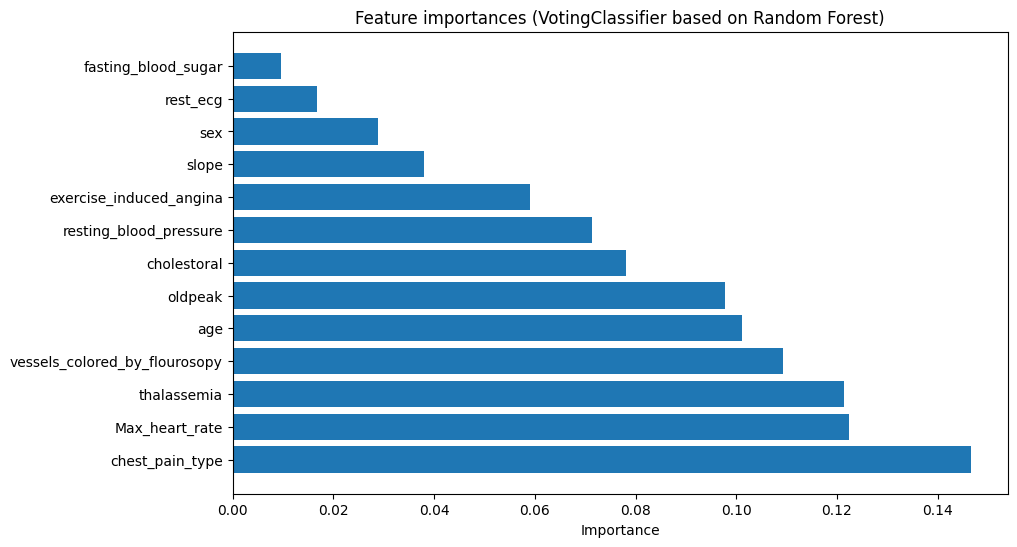


Feature ranking (StackingClassifier based on Logistic Regression):
1. feature thalassemia - -0.4344
2. feature chest_pain_type - -0.3397
3. feature oldpeak - -0.3244
4. feature vessels_colored_by_flourosopy - 0.2939
5. feature Max_heart_rate - 0.2565
6. feature exercise_induced_angina - -0.2254
7. feature sex - -0.1808
8. feature slope - -0.1479
9. feature resting_blood_pressure - -0.1393
10. feature age - -0.1082
11. feature cholestoral - -0.1044
12. feature rest_ecg - 0.1002
13. feature fasting_blood_sugar - -0.0127


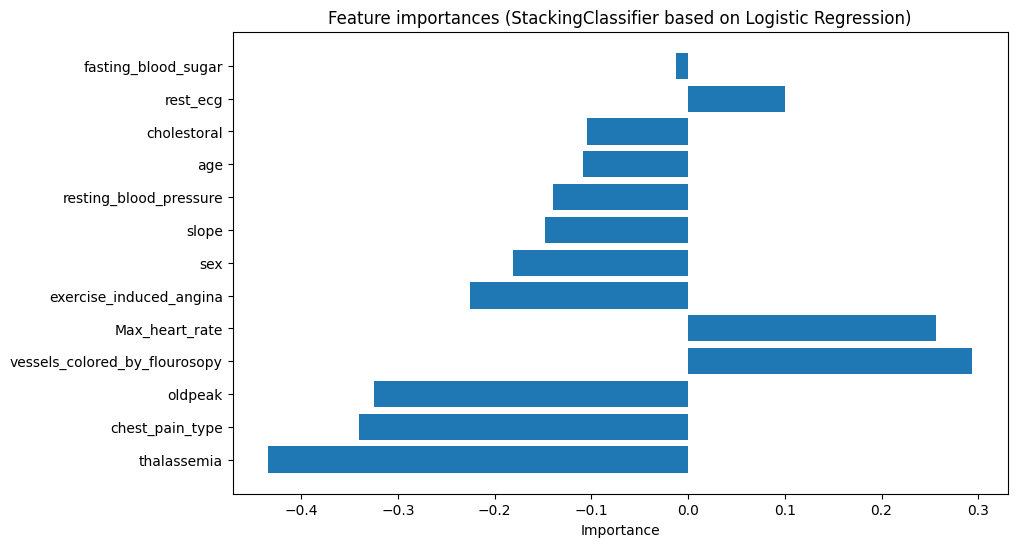

In [17]:
# 6. Отримайте узагальнені показники важливості кожного з досліджуваних предикторів та інтерпретуйте отримані дані.
import numpy as np

# 1. Отримуємо важливість ознак для VotingClassifier:
# VotingClassifier не має безпосередньо .feature_importances_, тому ми можемо отримати важливість через базові моделі:
# Важливість для RandomForest
voting_rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
voting_rf_model.fit(X_train, y_train)

# Виводимо важливість ознак для RandomForest (основна модель для VotingClassifier)
voting_importances = voting_rf_model.feature_importances_

# Сортуємо ознаки за їх важливістю
voting_indices = np.argsort(voting_importances)[::-1]

# Виведемо важливість ознак
print("Feature ranking (VotingClassifier based on Random Forest):")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. feature {X_train.columns[voting_indices[f]]} - {voting_importances[voting_indices[f]]:.4f}")

# Візуалізація важливості ознак
plt.figure(figsize=(10, 6))
plt.title("Feature importances (VotingClassifier based on Random Forest)")
plt.barh(range(X_train.shape[1]), voting_importances[voting_indices], align="center")
plt.yticks(range(X_train.shape[1]), X_train.columns[voting_indices])
plt.xlabel("Importance")
plt.show()

# 2. Отримуємо важливість ознак для StackingClassifier:
# Для StackingClassifier важливість визначається через фінальний estimator (наприклад, Logistic Regression):
stacking_final_model = stacking_best_model.final_estimator_  # Логістична регресія
stacking_final_model.fit(X_train, y_train)

# Виводимо коефіцієнти для логістичної регресії (це можна інтерпретувати як важливість)
stacking_coefficients = stacking_final_model.coef_[0]  # Якщо це багатокласова задача, беремо перший коефіцієнт

# Сортуємо ознаки за їх важливістю
stacking_indices = np.argsort(np.abs(stacking_coefficients))[::-1]

# Виведемо важливість ознак
print("\nFeature ranking (StackingClassifier based on Logistic Regression):")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. feature {X_train.columns[stacking_indices[f]]} - {stacking_coefficients[stacking_indices[f]]:.4f}")

# Візуалізація важливості ознак
plt.figure(figsize=(10, 6))
plt.title("Feature importances (StackingClassifier based on Logistic Regression)")
plt.barh(range(X_train.shape[1]), stacking_coefficients[stacking_indices], align="center")
plt.yticks(range(X_train.shape[1]), X_train.columns[stacking_indices])
plt.xlabel("Importance")
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier  # Імпорт KNN
from sklearn.ensemble import VotingClassifier, StackingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Розділяємо на тренувальні та тестові дані
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Базові моделі
dt_model = DecisionTreeClassifier(random_state=42)
lr_model = LogisticRegression(max_iter=1000, random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5)  # Створюємо KNN з 5 сусідами

# Рівень 1: базові моделі
base_models = [dt_model, lr_model, knn_model]

# Рівень 2: методи ансамблів
# Простий метод: Voting
voting_model = VotingClassifier(
    estimators=[('dt', dt_model), ('lr', lr_model), ('knn', knn_model)],
    voting='hard'  # Жорстке голосування
)

# Інший простий метод: Averaging (середнє усіх прогнозів)
averaging_model = VotingClassifier(
    estimators=[('dt', dt_model), ('lr', lr_model), ('knn', knn_model)],
    voting='soft'  # М'яке голосування (середнє ймовірностей)
)

# Рівень 3: складніші методи
stacking_model = StackingClassifier(
    estimators=[('dt', dt_model), ('lr', lr_model), ('knn', knn_model)],
    final_estimator=LogisticRegression(max_iter=1000, random_state=42)
)

boosting_model = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1, random_state=42),
    n_estimators=50, random_state=42
)

# Списки моделей для рівнів
level_2_models = [voting_model, averaging_model]
level_3_models = [stacking_model, boosting_model]

# Тренуємо та оцінюємо кожну модель на рівні 2
for model in level_2_models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{model.__class__.__name__} (Level 2) Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Тренуємо та оцінюємо кожну модель на рівні 3
for model in level_3_models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{model.__class__.__name__} (Level 3) Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Мета-ансамбль, який комбінує рівень 3 моделі
meta_model = VotingClassifier(
    estimators=[('stacking', stacking_model), ('boosting', boosting_model)],
    voting='soft'
)

meta_model.fit(X_train, y_train)
y_pred_meta = meta_model.predict(X_test)
print(f"Meta Model Accuracy: {accuracy_score(y_test, y_pred_meta):.4f}")


VotingClassifier (Level 2) Accuracy: 0.8701
VotingClassifier (Level 2) Accuracy: 0.9481
StackingClassifier (Level 3) Accuracy: 0.9708
AdaBoostClassifier (Level 3) Accuracy: 0.8344
Meta Model Accuracy: 0.9708
